In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
import itertools

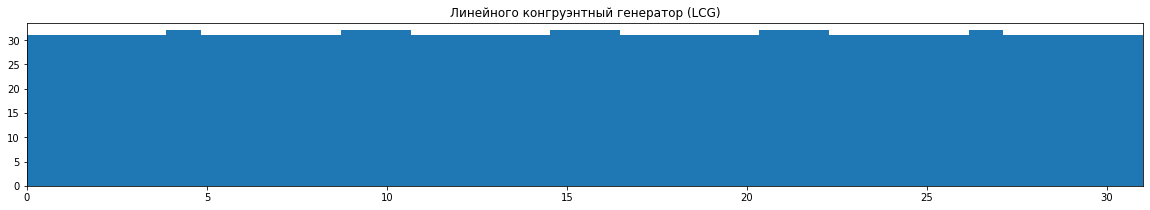

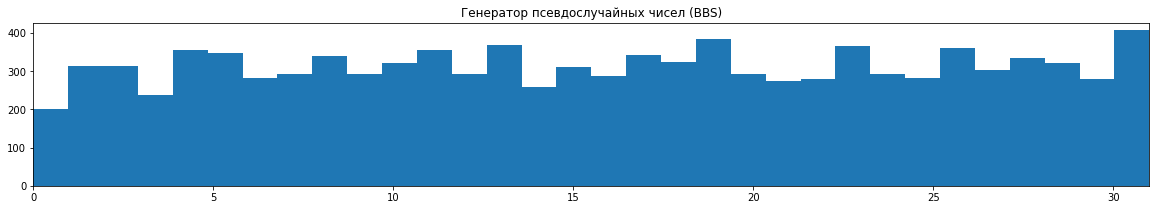

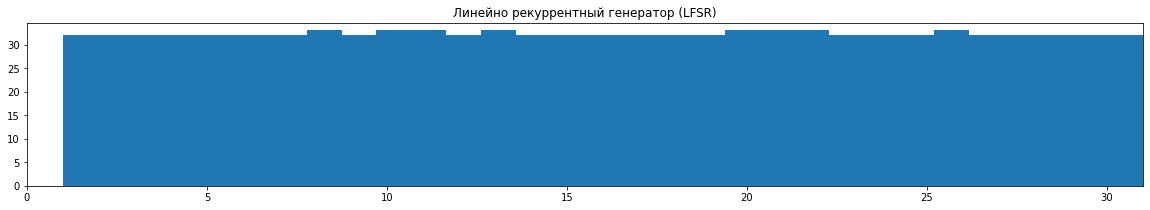

In [6]:
def is_coprime(x, y):
    return np.gcd(x, y) == 1

def is_prime(n):
    if n < 2:
        return False
    for number in islice(itertools.count(2), int(np.sqrt(n) - 1)):
        if n % number == 0:
            return False

    return True

class Generator:
    # linear congruential generator
    def lcg(self, limit, a, c, modulus, seed=1):
        fvalue = 0
        x = seed
        while fvalue < limit:
            fvalue += 1
            x = (a * x + c) % modulus
            yield x

    # Blum Blum Shub
    def bbs(self, limit, p, q, seed=1):
        np.random.seed(seed)
        if not (is_prime(p) and p % 4 == 3 and is_prime(q) and q % 4 == 3):
            raise ValueError("Wrong p or q")
        M = p * q
        # print(f"p = {p}")
        # print(f"q = {q}")
        # print(f"M = {M}")
        xs = np.array(np.nonzero(is_coprime(np.arange(2, M, dtype="int"), M)))[0]
        x_ind = np.random.randint(0, len(xs))
        np.random.seed()
        x = xs[x_ind]
        # print(x)
        #print(f"x = {x}")
        fvalue = 0
        while fvalue < limit:
            fvalue += 1
            out = 0
            for i in range(5):
                x = x ** 2 % M
                #print(x)
                out *= 2
                #print(x % 2)
                out += x % 2
            yield out

    # linear feedback shift register
    def lfsr(self, limit, polynom):
        n = 5
        A = np.eye(5, 5, -1)
        #https://books.ifmo.ru/file/pdf/958.pdf
        A[0] = polynom
        #print(A)
        x = (1, 0, 0, 0, 0)
        fvalue = 0
        while fvalue < limit:
            fvalue += 1
            
            x = A.dot(x) % 2
            #print(x)
            yield np.sum(x * (16, 8, 4, 2, 1))


count = 1000
m = 32
a = 17
c = 5

generator = Generator()
values = []
for value in generator.lcg(count, a, c, m):
    values.append(value)

plt.hist(values, bins=m)
plt.title("Линейного конгруэнтный генератор (LCG)")
plt.xlim(0, 31)
plt.show()

values = []
for value in generator.bbs(10000, 2851, 3559, seed=1):
    values.append(value)
#print(values)
plt.hist(values, bins=m)
plt.xlim(0, 31)
plt.title("Генератор псевдослучайных чисел (BBS)")
plt.show()

values = []
for value in generator.lfsr(1000, (0, 1, 1, 1, 1)):
    values.append(value)
c = np.bincount(values)
plt.hist(values, bins=31)
plt.xlim(0, 31)
plt.title("Линейно рекуррентный генератор (LFSR)")
plt.show()

Длинна: 50
Линейного конгруэнтный генератор (LCG): ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л, а, е, ъ, я, ф, щ, о, у, и, н, в, з, ь, б, ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л


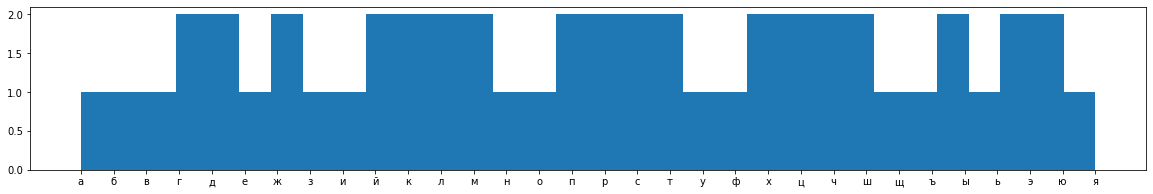

Генератор псевдослучайных чисел (BBS): п, д, с, ю, р, в, з, ы, ч, и, з, й, з, у, л, б, я, э, р, с, л, у, л, а, э, л, г, т, ф, п, з, э, р, ч, ц, б, к, с, з, ь, щ, в, щ, р, ц, ю, е, ц, э, з


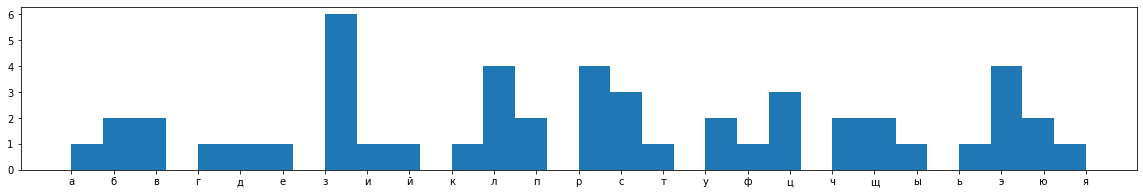

Линейно рекуррентный генератор (LFSR): и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я, п, з, у, й, д, т, щ, м, ж, г, б, р, и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я


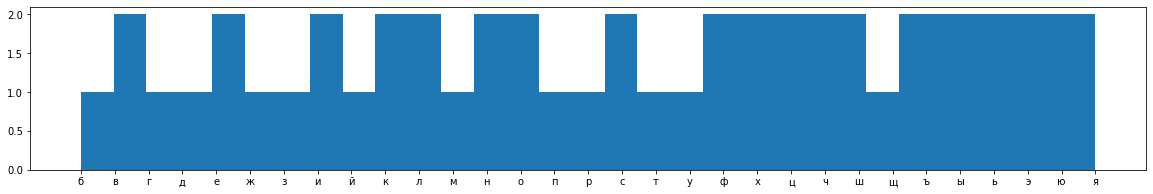

Длинна: 100
Линейного конгруэнтный генератор (LCG): ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л, а, е, ъ, я, ф, щ, о, у, и, н, в, з, ь, б, ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л, а, е, ъ, я, ф, щ, о, у, и, н, в, з, ь, б, ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л, а, е, ъ, я, ф, щ, о, у, и, н, в, з, ь, б, ц, ы, р, х


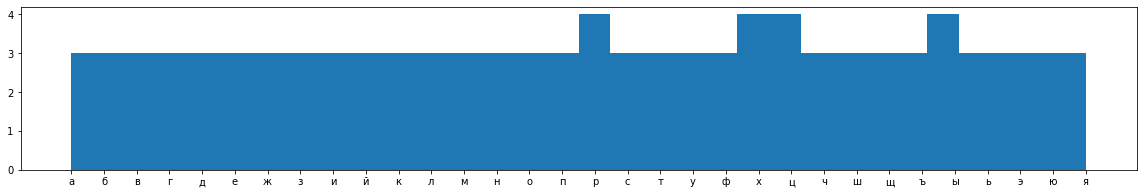

Генератор псевдослучайных чисел (BBS): п, д, с, ю, р, в, з, ы, ч, и, з, й, з, у, л, б, я, э, р, с, л, у, л, а, э, л, г, т, ф, п, з, э, р, ч, ц, б, к, с, з, ь, щ, в, щ, р, ц, ю, е, ц, э, з, щ, э, у, х, р, б, ь, ш, ж, а, ж, у, ъ, л, и, т, р, и, ю, л, с, т, х, ь, е, м, т, щ, г, д, щ, ю, в, ц, э, к, н, д, х, ъ, я, л, ъ, е, х, ч, ь, л, е, я


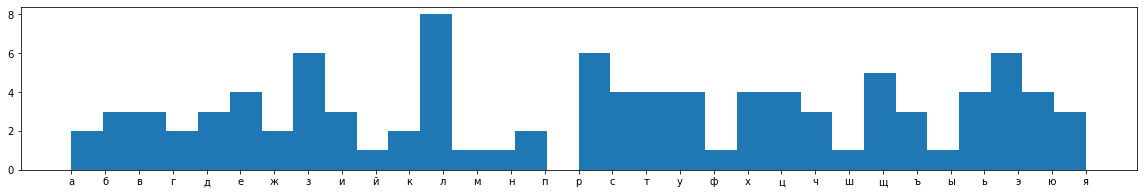

Линейно рекуррентный генератор (LFSR): и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я, п, з, у, й, д, т, щ, м, ж, г, б, р, и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я, п, з, у, й, д, т, щ, м, ж, г, б, р, и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я, п, з, у, й, д, т, щ, м, ж, г, б, р, и, ф, ъ, н, ц, л, х


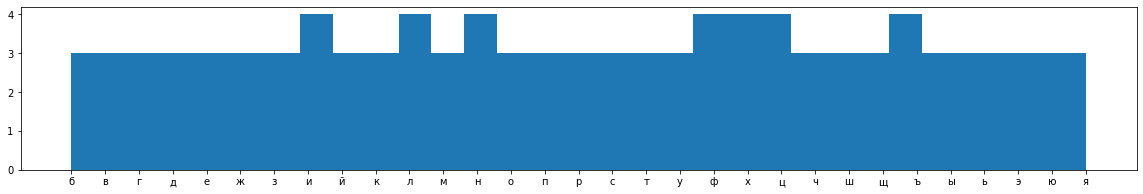

Длинна: 1000
Линейного конгруэнтный генератор (LCG): ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л, а, е, ъ, я, ф, щ, о, у, и, н, в, з, ь, б, ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л, а, е, ъ, я, ф, щ, о, у, и, н, в, з, ь, б, ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л, а, е, ъ, я, ф, щ, о, у, и, н, в, з, ь, б, ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л, а, е, ъ, я, ф, щ, о, у, и, н, в, з, ь, б, ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л, а, е, ъ, я, ф, щ, о, у, и, н, в, з, ь, б, ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л, а, е, ъ, я, ф, щ, о, у, и, н, в, з, ь, б, ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л, а, е, ъ, я, ф, щ, о, у, и, н, в, з, ь, б, ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л, а, е, ъ, я, ф, щ, о, у, и, н, в, з, ь, б, ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л, а, е, ъ, я, ф, щ, о, у, и, н, в, з, ь, б, ц, ы, р, х, к, п, д, й, ю, г, ш, э, т, ч, м, с, ж, л, а, е, ъ, я, ф, щ, о, у, и, н,

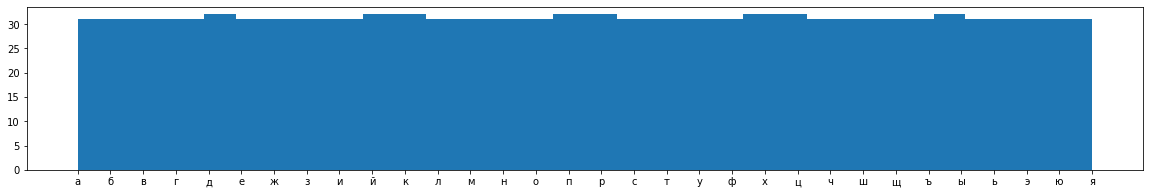

Генератор псевдослучайных чисел (BBS): п, д, с, ю, р, в, з, ы, ч, и, з, й, з, у, л, б, я, э, р, с, л, у, л, а, э, л, г, т, ф, п, з, э, р, ч, ц, б, к, с, з, ь, щ, в, щ, р, ц, ю, е, ц, э, з, щ, э, у, х, р, б, ь, ш, ж, а, ж, у, ъ, л, и, т, р, и, ю, л, с, т, х, ь, е, м, т, щ, г, д, щ, ю, в, ц, э, к, н, д, х, ъ, я, л, ъ, е, х, ч, ь, л, е, я, ь, м, н, о, е, ъ, я, ч, ы, н, я, м, о, р, а, а, к, к, ъ, ы, т, я, х, о, ы, ф, ж, м, а, е, р, э, к, ь, п, ъ, б, н, ф, л, э, и, м, ю, с, я, у, я, и, з, ш, г, й, у, у, д, р, ю, ц, т, ф, з, ю, б, н, т, в, л, и, к, н, ф, б, й, я, у, м, а, ъ, м, з, ы, п, ъ, е, р, а, с, д, у, ь, о, х, б, е, ь, ю, т, ю, э, е, ъ, т, ъ, п, б, о, ю, ъ, с, д, в, ш, ф, е, ъ, г, ъ, и, ы, ч, э, ж, б, й, к, я, ъ, ц, ш, в, п, д, л, щ, е, й, щ, я, р, й, ю, ю, б, е, в, ц, ф, е, г, и, л, ш, ы, у, я, э, ь, ъ, б, ч, ж, х, я, л, ю, ы, щ, й, л, а, я, н, ц, р, ч, л, ь, н, ь, у, ы, э, у, э, в, б, ъ, и, ш, с, ж, ы, ц, ь, т, р, ш, м, ь, м, я, а, в, г, п, р, с, в, и, м, к, ы, г, ю, х, ч, м, я, э, у

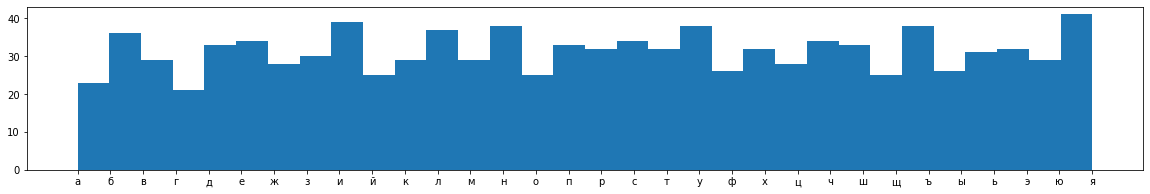

Линейно рекуррентный генератор (LFSR): и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я, п, з, у, й, д, т, щ, м, ж, г, б, р, и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я, п, з, у, й, д, т, щ, м, ж, г, б, р, и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я, п, з, у, й, д, т, щ, м, ж, г, б, р, и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я, п, з, у, й, д, т, щ, м, ж, г, б, р, и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я, п, з, у, й, д, т, щ, м, ж, г, б, р, и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я, п, з, у, й, д, т, щ, м, ж, г, б, р, и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я, п, з, у, й, д, т, щ, м, ж, г, б, р, и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я, п, з, у, й, д, т, щ, м, ж, г, б, р, и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я, п, з, у, й, д, т, щ, м, ж, г, б, р, и, ф, ъ, н, ц, л, х, к, е, в, с, ш, ь, о, ч, ы, э, ю, я, п, з, у, й, д, т, щ, м, ж, г, б, р, и, ф, ъ, н, ц, л, х, к, е, в, с

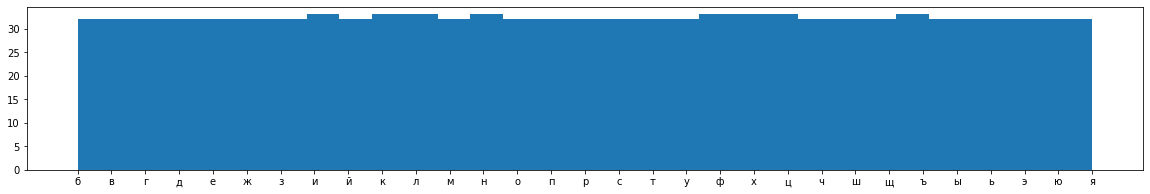

In [5]:
generators = [
    {
        "name": "Линейного конгруэнтный генератор (LCG)",
        "generator": generator.lcg,
        "params": {"a": 17, "c": 5, "m": 32},
        "bins": 32
    },
    {
        "name": "Генератор псевдослучайных чисел (BBS)",
        "generator": generator.bbs,
        "params": {"p": 2851, "q": 3559},
        "bins": 32
    },
    {
        "name": "Линейно рекуррентный генератор (LFSR)",
        "generator": generator.lfsr,
        "params": {"polynom": (0, 1, 1, 1, 1)},
        "bins": 31
    }
]

def to_char(i):
    return chr(ord('а') + int(i))

for i in [50, 100, 1000]:
    print(f"Длинна: {i}")
    for gen in generators:
        xs = [x for x in gen["generator"](i, *(gen["params"]).values())]
        xs_str = list(map(to_char, xs))
        print(f"{gen['name']}: {', '.join(xs_str)}")
        plt.rcParams["figure.figsize"] = (20,3)
        
        plt.hist(sorted(xs_str), bins=gen["bins"])
        plt.show()
        # print(i, *(gen["params"]).values())
        # for x in :
        #     print(x)
        
